In [1]:
import pandas as pd

file_2004_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\Individual_t104.dta"
file_2024_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\usu_individual_T124.xlsx"

data_2004 = pd.read_stata(file_2004_path, convert_categoricals=False) 
data_2024 = pd.read_excel(file_2024_path)

data_2004.columns = data_2004.columns.str.lower()
data_2024.columns = data_2024.columns.str.lower()

In [2]:
print(data_2004.head())
print(data_2024.head())

     codusu  nro_hogar  componente  h15    ano4  trimestre  region mas_500  \
0  125098          1.0         1.0  1.0  2004.0        1.0     1.0       S   
1  125397          1.0         1.0  1.0  2004.0        1.0     1.0       S   
2  125515          1.0         1.0  1.0  2004.0        1.0     1.0       S   
3  125558          1.0         1.0  1.0  2004.0        1.0     1.0       S   
4  125558          1.0         2.0  1.0  2004.0        1.0     1.0       S   

   aglomerado  pondera  ...  deccfr  ideccfr  rdeccfr  gdeccfr  pdeccfr  \
0        32.0   1299.0  ...      07                06       06            
1        32.0   2018.0  ...      00                00       00            
2        32.0   1486.0  ...      07                07       07            
3        32.0   1674.0  ...      08                08       08            
4        32.0   1674.0  ...      08                08       08            

   adeccfr  pj1_1  pj2_1  pj3_1  idimpp  
0       04    0.0    0.0    0.0   0000

In [3]:
CABA_GBA_codes = [32, 33]
data_2004_filtered = data_2004[data_2004['aglomerado'].isin(CABA_GBA_codes)]
data_2024_filtered = data_2024[data_2024['aglomerado'].isin(CABA_GBA_codes)]

In [4]:
combined_data = pd.concat([data_2004_filtered, data_2024_filtered], keys=[2004, 2024])  

print(combined_data.head())

print(combined_data.info())

output_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP3\combined_data_bruto.csv"
combined_data.to_csv(output_path, index=False)

          codusu  nro_hogar  componente  h15    ano4  trimestre  region  \
2004 0  125098          1.0         1.0  1.0  2004.0        1.0     1.0   
     1  125397          1.0         1.0  1.0  2004.0        1.0     1.0   
     2  125515          1.0         1.0  1.0  2004.0        1.0     1.0   
     3  125558          1.0         1.0  1.0  2004.0        1.0     1.0   
     4  125558          1.0         2.0  1.0  2004.0        1.0     1.0   

       mas_500  aglomerado  pondera  ...  adeccfr  pj1_1  pj2_1  pj3_1  \
2004 0       S        32.0   1299.0  ...       04    0.0    0.0    0.0   
     1       S        32.0   2018.0  ...       00    0.0    0.0    0.0   
     2       S        32.0   1486.0  ...       05    0.0    0.0    0.0   
     3       S        32.0   1674.0  ...       06    0.0    0.0    0.0   
     4       S        32.0   1674.0  ...       06    0.0    0.0    0.0   

        idimpp  ch05  imputa  pondiio  pondii  pondih  
2004 0   00000   NaN     NaN      NaN     NaN   

In [5]:
data_2004_filtered.loc[:, 'ch06'] = pd.to_numeric(data_2004_filtered['ch06'], errors='coerce')
data_2004_filtered = data_2004_filtered.dropna(subset=['ch06'])

In [6]:
combined_data = combined_data[
    (combined_data['ipcf'] >= 0) &  # Ingreso válido
    (combined_data['ch06'] >= 0) &  # Edad mínima
    (combined_data['ch06'] <= 110)  # Edad máxima razonable
]

In [7]:
print(combined_data.info())
print(combined_data.head())

# Cambiar la ruta del archivo de salida
output_path = r"C:\Users\Marcia Lopez\Desktop\pruebas\TP4\combined_data_cleaned.csv"
combined_data.to_csv(output_path, index=False)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14516 entries, (np.int64(2004), np.int64(0)) to (np.int64(2024), np.int64(46049))
Columns: 181 entries, codusu to pondih
dtypes: float64(144), object(37)
memory usage: 20.7+ MB
None
          codusu  nro_hogar  componente  h15    ano4  trimestre  region  \
2004 0  125098          1.0         1.0  1.0  2004.0        1.0     1.0   
     1  125397          1.0         1.0  1.0  2004.0        1.0     1.0   
     2  125515          1.0         1.0  1.0  2004.0        1.0     1.0   
     3  125558          1.0         1.0  1.0  2004.0        1.0     1.0   
     4  125558          1.0         2.0  1.0  2004.0        1.0     1.0   

       mas_500  aglomerado  pondera  ...  adeccfr  pj1_1  pj2_1  pj3_1  \
2004 0       S        32.0   1299.0  ...       04    0.0    0.0    0.0   
     1       S        32.0   2018.0  ...       00    0.0    0.0    0.0   
     2       S        32.0   1486.0  ...       05    0.0    0.0    0.0   
     3       S       

In [8]:
missing_data = combined_data.isnull().mean() * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

imputa     99.469551
ch05       51.777349
pondiio    51.777349
pondii     51.777349
pondih     51.777349
             ...    
pp08f2     26.012676
pp08j3     26.012676
pp08j2     26.012676
ch14       25.041334
p47t        0.282447
Length: 111, dtype: float64


In [9]:
print(combined_data[['ipcf', 'pondera']].describe())

               ipcf       pondera
count  1.451600e+04  14516.000000
mean   7.759574e+04   1931.660375
std    2.796873e+05    900.573050
min    0.000000e+00     42.000000
25%    5.714286e+01   1441.000000
50%    2.666667e+02   1685.500000
75%    5.808333e+04   2237.000000
max    1.131233e+07   8685.000000


In [10]:
data = pd.concat([data_2004, data_2024], ignore_index=True)

In [11]:
data.fillna(0, inplace=True)

In [12]:
print("Columnas disponibles en el DataFrame:")
print(data.columns)

Columnas disponibles en el DataFrame:
Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'adeccfr', 'pj1_1', 'pj2_1', 'pj3_1', 'idimpp', 'ch05', 'imputa',
       'pondiio', 'pondii', 'pondih'],
      dtype='object', length=181)


In [13]:
data['ocupado'] = data['estado'].apply(lambda x: 1 if x == 1 else 0)  # 1 si ocupado, 0 en otros casos
ocupados_por_hogar = data.groupby('nro_hogar')['ocupado'].sum()
total_por_hogar = data.groupby('nro_hogar')['ocupado'].count()
data['proporcion_ocupados_hogar'] = data['nro_hogar'].map(ocupados_por_hogar / total_por_hogar)

In [14]:
data['ch06'] = pd.to_numeric(data['ch06'], errors='coerce')  # Convertir a numérico
edad_promedio = data.groupby('nro_hogar')['ch06'].mean()
data['edad_promedio_hogar'] = data['nro_hogar'].map(edad_promedio)

In [15]:
data['nivel_ed'] = pd.to_numeric(data['nivel_ed'], errors='coerce')  # Convertir a numérico
nivel_educativo_promedio = data.groupby('nro_hogar')['nivel_ed'].mean()
data['nivel_educativo_promedio_hogar'] = data['nro_hogar'].map(nivel_educativo_promedio)

In [16]:
print("Datos actualizados con las nuevas variables:")
print(data[['nro_hogar', 'proporcion_ocupados_hogar', 'edad_promedio_hogar', 'nivel_educativo_promedio_hogar']].head())

Datos actualizados con las nuevas variables:
   nro_hogar  proporcion_ocupados_hogar  edad_promedio_hogar  \
0        1.0                   0.407883            34.076769   
1        1.0                   0.407883            34.076769   
2        1.0                   0.407883            34.076769   
3        1.0                   0.407883            34.076769   
4        1.0                   0.407883            34.076769   

   nivel_educativo_promedio_hogar  
0                        3.570048  
1                        3.570048  
2                        3.570048  
3                        3.570048  
4                        3.570048  


NameError: name 'plt' is not defined

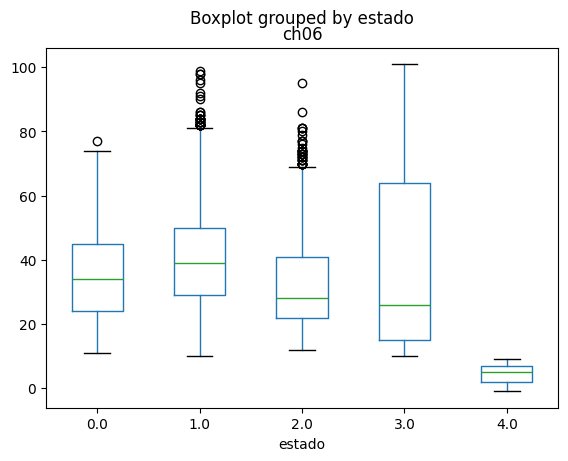

In [17]:
# Boxplot para edad por estado de ocupación
data.boxplot(column='ch06', by='estado', grid=False)
plt.title('Boxplot de Edad por Estado de Ocupación')
plt.suptitle("")  # Eliminar el título general que agrega automáticamente pandas
plt.xlabel('Estado')
plt.ylabel('Edad')
plt.show()

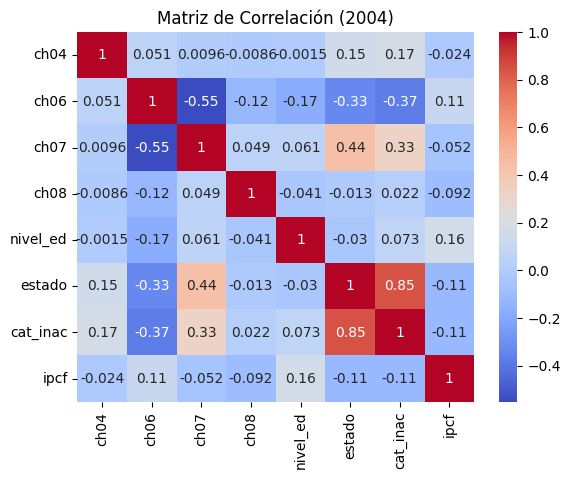

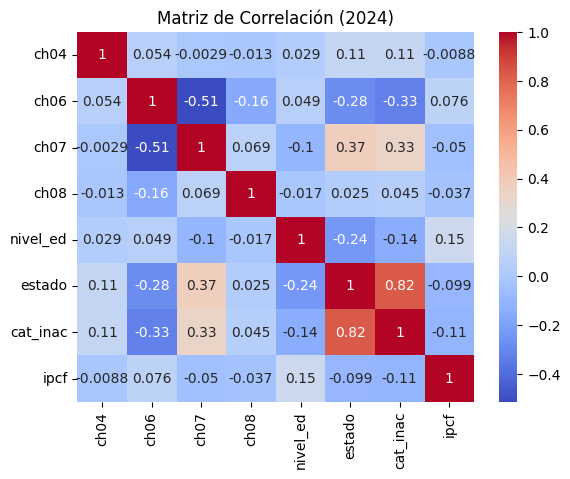

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
variables_interes = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

for año in [2004, 2024]:
    data_year = combined_data.loc[año, variables_interes].dropna()
    
    corr_matrix = data_year.corr()
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Matriz de Correlación ({año})')
    plt.show()

In [19]:
print(data.groupby('estado')['nivel_ed'].mean())

estado
0.0    3.767241
1.0    3.903044
2.0    3.619760
3.0    3.018230
4.0    4.162192
Name: nivel_ed, dtype: float64


In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

data['desocupado'] = np.where(data['estado'] == 2, 1, 0)

data_2004 = data[data['ano4'] == 2004]
data_2024 = data[data['ano4'] == 2024]

X_2004 = data_2004.drop(columns=['estado', 'desocupado', 'ano4'])
y_2004 = data_2004['desocupado']

X_2024 = data_2024.drop(columns=['estado', 'desocupado', 'ano4'])
y_2024 = data_2024['desocupado']

X_2004['intercept'] = 1
X_2024['intercept'] = 1

X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

print(f"2004 - X_train: {X_train_2004.shape}, X_test: {X_test_2004.shape}")
print(f"2024 - X_train: {X_train_2024.shape}, X_test: {X_test_2024.shape}")

2004 - X_train: (31702, 184), X_test: (13587, 184)
2024 - X_train: (32235, 184), X_test: (13815, 184)


In [21]:
print(X_train_2004.dtypes)  
print(y_train_2004.unique())  

codusu                             object
nro_hogar                         float64
componente                        float64
h15                               float64
trimestre                         float64
                                   ...   
ocupado                             int64
proporcion_ocupados_hogar         float64
edad_promedio_hogar               float64
nivel_educativo_promedio_hogar    float64
intercept                           int64
Length: 184, dtype: object
[0 1]


In [22]:
print(X_train_2024.dtypes)  
print(y_train_2024.unique())  

codusu                             object
nro_hogar                         float64
componente                        float64
h15                               float64
trimestre                         float64
                                   ...   
ocupado                             int64
proporcion_ocupados_hogar         float64
edad_promedio_hogar               float64
nivel_educativo_promedio_hogar    float64
intercept                           int64
Length: 184, dtype: object
[0 1]


Resultados para el año 2004:
L1 (LASSO):
Matriz de Confusión (2004, l1, alpha=1):
 [[12777     0]
 [    0   810]]
Año 2004 - AUC: 1.0000, Accuracy: 1.0000


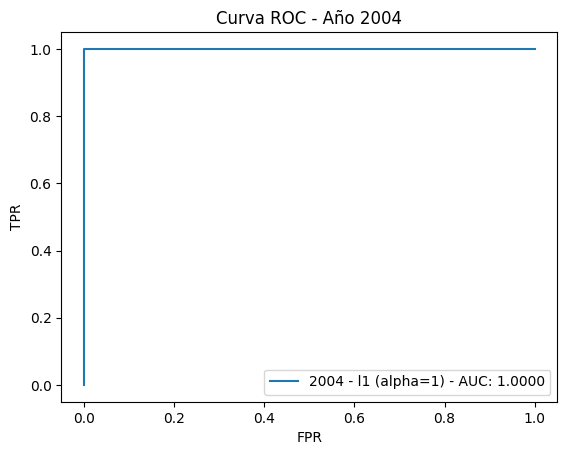


L2 (Ridge):
Matriz de Confusión (2004, l2, alpha=1):
 [[12777     0]
 [  224   586]]
Año 2004 - AUC: 0.9299, Accuracy: 0.9835


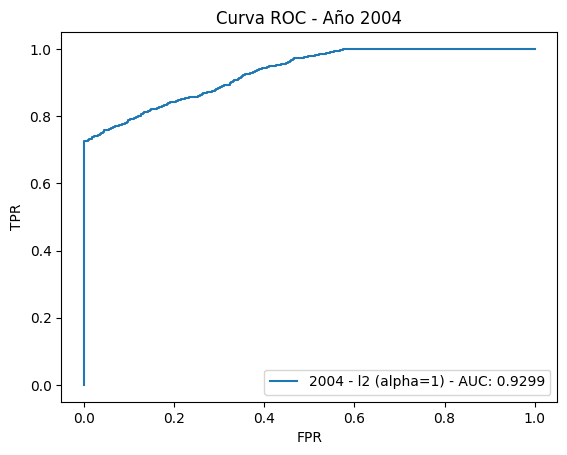


Resultados para el año 2024:
L1 (LASSO):
Matriz de Confusión (2024, l1, alpha=1):
 [[13389     0]
 [    0   426]]
Año 2024 - AUC: 1.0000, Accuracy: 1.0000


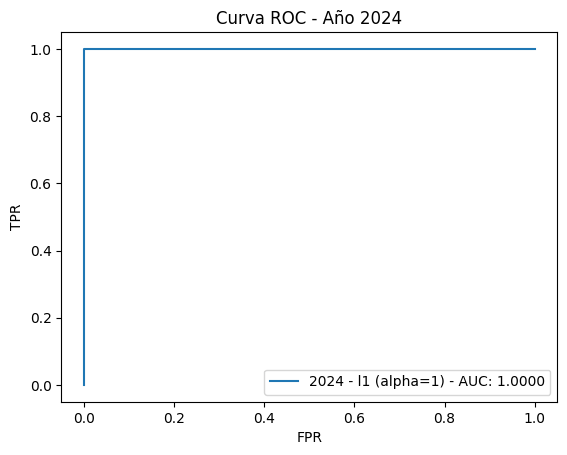


L2 (Ridge):
Matriz de Confusión (2024, l2, alpha=1):
 [[13387     2]
 [   91   335]]
Año 2024 - AUC: 0.9577, Accuracy: 0.9933


C:\Users\Marcia Lopez\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


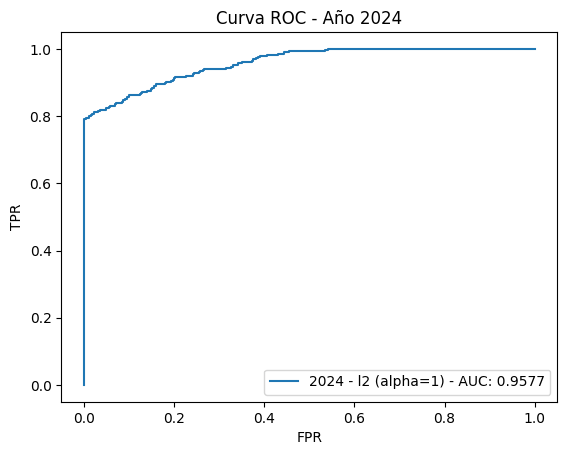

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Función para preprocesar los datos y entrenar/evaluar el modelo
def preprocess_and_train(X_train, y_train, X_test, y_test, penalty, alpha, year):
    # Convertir valores no numéricos en NaN y rellenar/descartar según corresponda
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Ajustar el modelo de regresión logística
    model = LogisticRegression(penalty=penalty, C=1/alpha, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    print(f"Matriz de Confusión ({year}, {penalty}, alpha={alpha}):\n", cm)

    # Métricas
    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)
    print(f"Año {year} - AUC: {auc:.4f}, Accuracy: {acc:.4f}")

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{year} - {penalty} (alpha={alpha}) - AUC: {auc:.4f}')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC - Año {year}")
    plt.legend()
    plt.show()

    return model

# Resultados para 2004
print("Resultados para el año 2004:")
print("L1 (LASSO):")
model_2004_l1 = preprocess_and_train(X_train_2004, y_train_2004, X_test_2004, y_test_2004, penalty='l1', alpha=1, year=2004)

print("\nL2 (Ridge):")
model_2004_l2 = preprocess_and_train(X_train_2004, y_train_2004, X_test_2004, y_test_2004, penalty='l2', alpha=1, year=2004)

# Resultados para 2024
print("\nResultados para el año 2024:")
print("L1 (LASSO):")
model_2024_l1 = preprocess_and_train(X_train_2024, y_train_2024, X_test_2024, y_test_2024, penalty='l1', alpha=1, year=2024)

print("\nL2 (Ridge):")
model_2024_l2 = preprocess_and_train(X_train_2024, y_train_2024, X_test_2024, y_test_2024, penalty='l2', alpha=1, year=2024)

In [24]:
# Crear un DataFrame para almacenar los resultados
results = []

# Función para almacenar resultados
def preprocess_and_train_with_results(X_train, y_train, X_test, y_test, penalty, alpha, year):
    X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
    X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

    model = LogisticRegression(penalty=penalty, C=1/alpha, solver='liblinear', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        'Año': year,
        'Penalización': penalty,
        'Alpha': alpha,
        'Accuracy': acc,
        'AUC': auc,
        'Matriz de Confusión': cm.tolist()
    })

    return model

# Entrenar modelos y guardar resultados
print("Procesando resultados...")
preprocess_and_train_with_results(X_train_2004, y_train_2004, X_test_2004, y_test_2004, penalty='l1', alpha=1, year=2004)
preprocess_and_train_with_results(X_train_2004, y_train_2004, X_test_2004, y_test_2004, penalty='l2', alpha=1, year=2004)
preprocess_and_train_with_results(X_train_2024, y_train_2024, X_test_2024, y_test_2024, penalty='l1', alpha=1, year=2024)
preprocess_and_train_with_results(X_train_2024, y_train_2024, X_test_2024, y_test_2024, penalty='l2', alpha=1, year=2024)

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar el DataFrame
print(results_df)

# Opcional: Guardar en un archivo CSV
results_df.to_csv("resultados_comparativos.csv", index=False)


Procesando resultados...
    Año Penalización  Alpha  Accuracy       AUC       Matriz de Confusión
0  2004           l1      1  1.000000  1.000000    [[12777, 0], [0, 810]]
1  2004           l2      1  0.983514  0.929939  [[12777, 0], [224, 586]]
2  2024           l1      1  1.000000  1.000000    [[13389, 0], [0, 426]]
3  2024           l2      1  0.993268  0.957659   [[13387, 2], [91, 335]]


C:\Users\Marcia Lopez\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_5864\558209744.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lambda', y='MSE', data=df_ridge_exploded, palette='Blues')


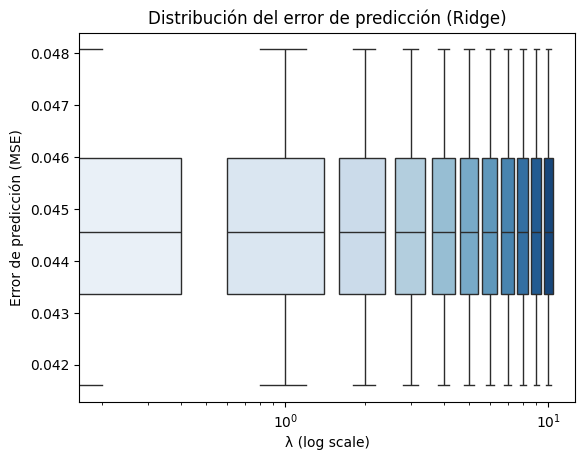

C:\Users\Marcia Lopez\AppData\Local\Temp\ipykernel_5864\558209744.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Lambda', y='MSE', data=df_lasso_exploded, palette='Greens')


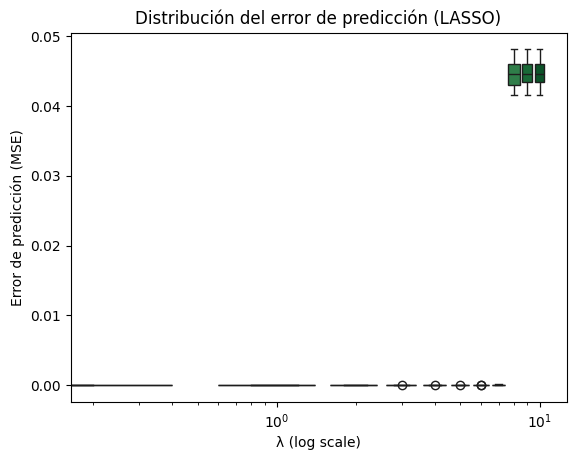

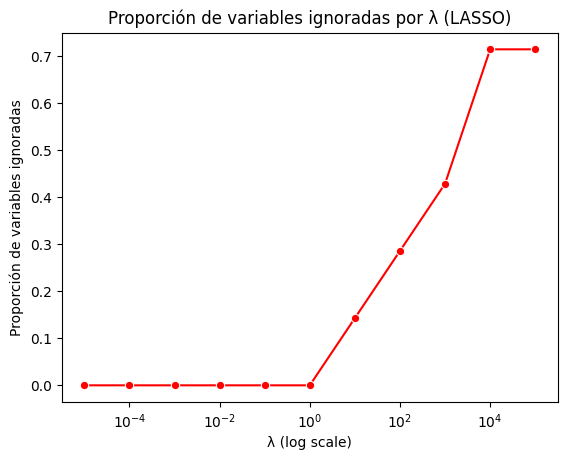

λ óptimo para Ridge: 1e-05
λ óptimo para LASSO: 1e-05


In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de características
selected_features = [
    'nro_hogar', 
    'proporcion_ocupados_hogar', 
    'edad_promedio_hogar', 
    'nivel_educativo_promedio_hogar', 
    'estado', 
    'cat_inac', 
    'ipcf'
]

# Variables dependiente e independiente
X = data[selected_features]  
y = data['desocupado']     

# Generar los valores de λ (10^n)
lambdas = 10.0 ** np.arange(-5, 6)  
kf = KFold(n_splits=10, shuffle=True, random_state=42)

results_ridge = []
results_lasso = []
ignored_features = []

# Barrido en λ
for lam in lambdas:
    # Ridge (penalty='l2')
    ridge = LogisticRegression(penalty='l2', C=1/lam, solver='liblinear', max_iter=1000)
    mse_ridge = -cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
    results_ridge.append((lam, mse_ridge.mean(), mse_ridge.tolist()))
    
    # LASSO (penalty='l1')
    lasso = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear', max_iter=1000)
    mse_lasso = -cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_squared_error')
    results_lasso.append((lam, mse_lasso.mean(), mse_lasso.tolist()))
    
    lasso.fit(X, y)
    ignored_proportion = np.mean(lasso.coef_ == 0)
    ignored_features.append((lam, ignored_proportion))

# Crear DataFrames
df_ridge = pd.DataFrame(results_ridge, columns=['Lambda', 'Mean_MSE', 'MSE'])
df_lasso = pd.DataFrame(results_lasso, columns=['Lambda', 'Mean_MSE', 'MSE'])
df_ignored = pd.DataFrame(ignored_features, columns=['Lambda', 'Ignored_Proportion'])

# Convertir las listas en filas separadas para las gráficas
df_ridge_exploded = df_ridge.explode('MSE')
df_ridge_exploded['MSE'] = df_ridge_exploded['MSE'].astype(float)

df_lasso_exploded = df_lasso.explode('MSE')
df_lasso_exploded['MSE'] = df_lasso_exploded['MSE'].astype(float)

# Graficar resultados para Ridge
sns.boxplot(x='Lambda', y='MSE', data=df_ridge_exploded, palette='Blues')
plt.title('Distribución del error de predicción (Ridge)')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Error de predicción (MSE)')
plt.show()

# Graficar resultados para LASSO
sns.boxplot(x='Lambda', y='MSE', data=df_lasso_exploded, palette='Greens')
plt.title('Distribución del error de predicción (LASSO)')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Error de predicción (MSE)')
plt.show()

# Graficar proporción de variables ignoradas (LASSO)
sns.lineplot(x='Lambda', y='Ignored_Proportion', data=df_ignored, marker='o', color='red')
plt.title('Proporción de variables ignoradas por λ (LASSO)')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Proporción de variables ignoradas')
plt.show()

# Identificar λ óptimo para Ridge y LASSO
lambda_opt_ridge = df_ridge.loc[df_ridge['Mean_MSE'].idxmin(), 'Lambda']
lambda_opt_lasso = df_lasso.loc[df_lasso['Mean_MSE'].idxmin(), 'Lambda']

print(f"λ óptimo para Ridge: {lambda_opt_ridge}")
print(f"λ óptimo para LASSO: {lambda_opt_lasso}")

In [31]:
X_2004 = data_2004[selected_features]
y_2004 = data_2004['desocupado']

results_ridge_2004 = []
results_lasso_2004 = []
ignored_features_2004 = []

for lam in lambdas:
    ridge = LogisticRegression(penalty='l2', C=1/lam, solver='liblinear', max_iter=1000)
    mse_ridge_2004 = -cross_val_score(ridge, X_2004, y_2004, cv=kf, scoring='neg_mean_squared_error')
    results_ridge_2004.append((lam, mse_ridge_2004.mean(), mse_ridge_2004))
    
    lasso = LogisticRegression(penalty='l1', C=1/lam, solver='liblinear', max_iter=1000)
    mse_lasso_2004 = -cross_val_score(lasso, X_2004, y_2004, cv=kf, scoring='neg_mean_squared_error')
    results_lasso_2004.append((lam, mse_lasso_2004.mean(), mse_lasso_2004))
    
    lasso.fit(X_2004, y_2004)
    ignored_features_2004.append((lam, np.mean(lasso.coef_ == 0)))

df_ridge_2004 = pd.DataFrame(results_ridge_2004, columns=['Lambda', 'Mean_MSE', 'MSE'])
df_lasso_2004 = pd.DataFrame(results_lasso_2004, columns=['Lambda', 'Mean_MSE', 'MSE'])
df_ignored_2004 = pd.DataFrame(ignored_features_2004, columns=['Lambda', 'Ignored_Proportion'])

# Identificar λ óptimo para Ridge y LASSO en 2004
lambda_opt_ridge_2004 = df_ridge_2004.loc[df_ridge_2004['Mean_MSE'].idxmin(), 'Lambda']
lambda_opt_lasso_2004 = df_lasso_2004.loc[df_lasso_2004['Mean_MSE'].idxmin(), 'Lambda']

# Guardar MSE y proporción ignorada para LASSO
mse_ridge_2004 = df_ridge_2004['Mean_MSE'].min()
mse_lasso_2004 = df_lasso_2004['Mean_MSE'].min()
ignored_proportion_lasso_2004 = df_ignored_2004.loc[df_ignored_2004['Lambda'] == lambda_opt_lasso_2004, 'Ignored_Proportion'].values[0]

    Año Modelo  Lambda Óptimo       MSE  Proporción Ignorada
0  2004  Ridge        0.00001  0.000044                  NaN
1  2004  LASSO        0.00001  0.000022                  0.0
2  2024  Ridge        0.00001  0.044658                  NaN
3  2024  LASSO        0.00001  0.000000                  0.0


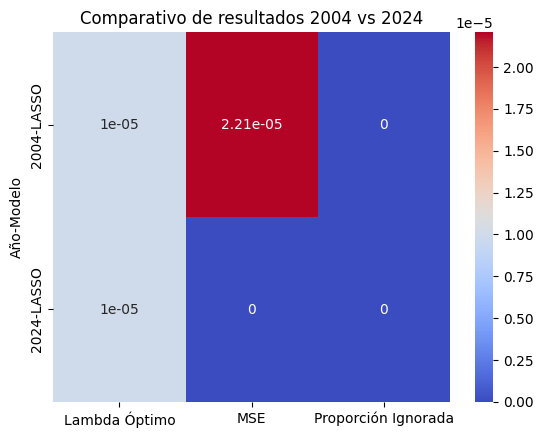

In [32]:
results_2004 = {
    'Año': ['2004', '2004'],
    'Modelo': ['Ridge', 'LASSO'],
    'Lambda Óptimo': [lambda_opt_ridge_2004, lambda_opt_lasso_2004],
    'MSE': [mse_ridge_2004, mse_lasso_2004],
    'Proporción Ignorada': [None, ignored_proportion_lasso_2004]
}

results_2024 = {
    'Año': ['2024', '2024'],
    'Modelo': ['Ridge', 'LASSO'],
    'Lambda Óptimo': [lambda_opt_ridge, lambda_opt_lasso],
    'MSE': [df_ridge['Mean_MSE'].min(), df_lasso['Mean_MSE'].min()],
    'Proporción Ignorada': [None, df_ignored.loc[df_ignored['Lambda'] == lambda_opt_lasso, 'Ignored_Proportion'].values[0]]
}

df_results = pd.concat([pd.DataFrame(results_2004), pd.DataFrame(results_2024)], ignore_index=True)

print(df_results)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_results.set_index(['Año', 'Modelo']).dropna().astype(float), annot=True, fmt=".3g", cmap="coolwarm")
plt.title("Comparativo de resultados 2004 vs 2024")
plt.show()